<a href="https://colab.research.google.com/github/Narendraiitg/Handwritten-digits-classification-using-neural-network/blob/main/Handwritten_digits_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves by aading the same.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Loading the MNIST dataset from the keras
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Checking the length of training and testing data
print(len(X_train),len(X_test))

60000 10000


So our taring data consist of 60000 images and our test data consist of 10000 images & all are grayscaled images 

In [4]:
# We can also check the size/dimension of one image
X_train[0].shape

(28, 28)

So we have images of dimension 28x28

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

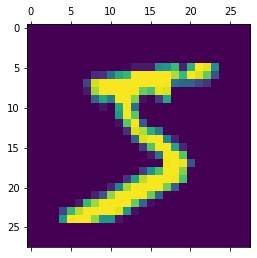

In [6]:
plt.matshow(X_train[0])

In [7]:
# We can also check the training element corresponding to the X_train[0]
y_train[0]

5

In [8]:
# Normalizing the pixels values between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We can see that all the values in above 2D array are converted between 0-1

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
print(X_train_flattened.shape,X_test_flattened.shape)

(60000, 784) (10000, 784)


So our 60000 training images of dimension 28x28 are falttened into 1D array of size 784

Similarly 10000 test images of dimension 28x28 are falttened into 1D array of size 784

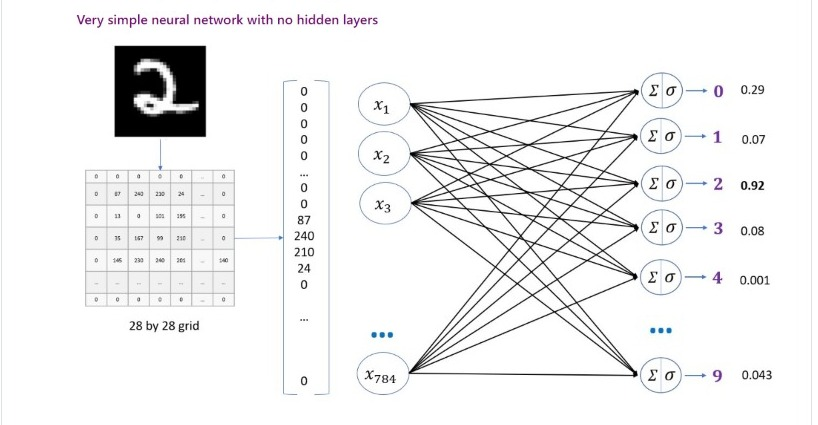

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # only input layer with 784 inputs and having a output with 10 neurons with sigmoid in each neurons
])

model.compile(optimizer='adam', # Using adam optimizer
              loss='sparse_categorical_crossentropy', # Calculating the loss using cross entropy
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5) # training our model

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4682 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9227
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9254


We can see that the highest accuracy on the training samples is 92.54 %

In [15]:
# Lets check our accuracy on test data
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9255


[0.2686198353767395, 0.9254999756813049]

We can see that the accuracy on the test samples is 92.54 %

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([1.7542720e-02, 4.8171773e-07, 6.8198182e-02, 9.4597208e-01,
       2.0881959e-03, 1.0109092e-01, 1.5305336e-06, 9.9983823e-01,
       1.0721079e-01, 6.8827242e-01], dtype=float32)

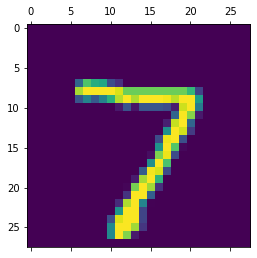

In [17]:
plt.matshow(X_test[0])

In [18]:
np.argmax(y_predicted[0])

7

np.argmax finds a maximum element from an array and returns the index of it, in above it is returning the 7 that means y_predicted[0] have the max value at index 7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    6,    2,    3,    1],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   5,   11,  913,   19,   10,    5,   13,   10,   42,    4],
       [   1,    0,   15,  938,    0,   15,    2,   12,   21,    6],
       [   2,    2,    2,    1,  911,    0,   11,    4,    9,   40],
       [   8,    3,    2,   45,   10,  760,   15,   10,   32,    7],
       [  11,    3,    7,    1,    7,   11,  913,    2,    3,    0],
       [   1,    8,   22,    6,    5,    0,    0,  960,    1,   25],
       [   4,   14,    5,   25,    9,   22,    8,   13,  868,    6],
       [  10,    7,    1,   13,   24,    5,    0,   31,    5,  913]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

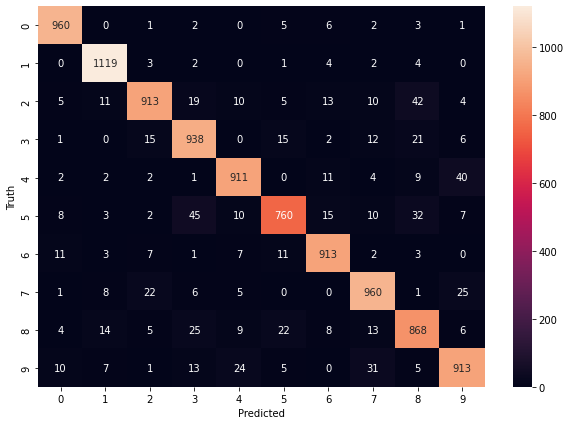

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [24]:
model1 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam', # Using adam optimizer
              loss='sparse_categorical_crossentropy', # Calculating the loss using cross entropy
              metrics=['accuracy'])

model1.fit(X_train_flattened, y_train, epochs=5) # training our model

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2752 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1237 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9839


So by using the single hidden layer we can have the accyracy of 98.39 % on the training set

In [25]:
# Lets check our accuracy on test data
model1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9776


[0.07197432219982147, 0.9775999784469604]

We can see that the accuracy on the test samples reached to 97.75 % initailly it was 92.54 when we are not using any hidden layer

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

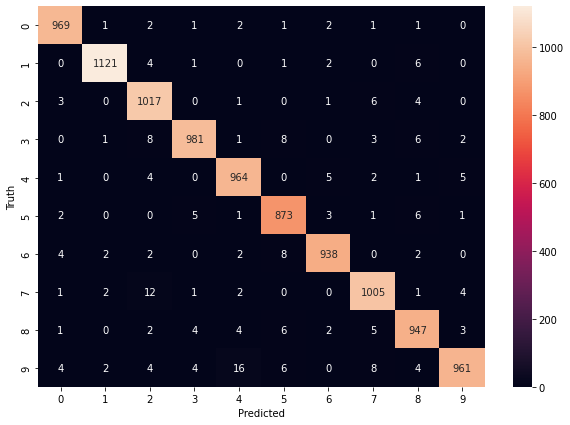

In [27]:
y_predicted = model1.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # we are falttening the image in this step only
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2818 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1317 - accuracy: 0.9615
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0902 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0691 - accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [30]:
# Lets check our accuracy on test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0820 - accuracy: 0.9790


[0.08195048570632935, 0.9789999723434448]